In [1]:
import sys
sys.path.append("../")
from IPython.display import display, Math
import os
import numpy as np
import scipy as sci
import matrix_handler as mx

zadania = "zadania"

Ponieważ wiemy, że pocisk porusza się po parabolicznym torze to wzór funkcji wygląda następująco:
$$ f(x) = a_0 x^2 + a_1 x + a_2 $$
Tym samym możemy wstawić wartości położenia pocisku $x$ do funkcji i stworzyć macierz $A$:
$$  A = \begin{bmatrix}
        0 & 0 & 1\\
        62500 & 250 & 1\\
        250000 & 500 & 1\\
        562500 & 750 & 1\\
        1000000 & 1000 & 1\\
        \end{bmatrix}$$
Natomiast wektor $b$ jest nam wprost dany z pomiarów wysokości pocisku i wygląda następująco:
$$ b^T = \begin{bmatrix}
        0 & 8 & 15 & 19 & 20
        \end{bmatrix}$$

#### Rozwiązanie z wykorzystaniem metod wbudowanych

In [2]:
A = np.loadtxt(os.path.join(zadania, "zad3.txt"), float, delimiter=" ", ndmin=2)
b = np.loadtxt(os.path.join(zadania, "zad3_b.txt"), float, delimiter=" ", ndmin=2)

x, _, _, _ = sci.linalg.lstsq(A, b)
display(Math("A^T ="))
mx.print_matrix(A.T)
display(Math("b^T = "))
mx.print_matrix(b.T)
display(Math("x^T = "))
mx.print_matrix(x.T)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Rozwiązanie z wykorzystaniem zaimplementowanych funkcji

In [3]:
from solvers import least_square

x = least_square(A, b)
display(Math("x^T = "))
mx.print_matrix(x.T)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Przeprowadzono porównanie wartości położenia pocisku do tych przewidywanych z apryksomowanej funkcji parabolicznej. Możemy zauważyć, że wyniki wartości funkcji parabolicznej są zbliżone do rzeczywistych.

In [4]:
samplesLen = len(b)
coefsNum = len(x)
y = []
for i in range(samplesLen):
    y.append(x[0]*A[i][0]+x[1]*A[i][1]+x[2]*A[i][2])
    print("f(", float(A[i][1]) , ") = ", float(b[i]), " vs ", float(y[i]))

f( 0.0 ) =  0.0  vs  -0.22857142857140444
f( 250.0 ) =  8.0  vs  8.514285714285721
f( 500.0 ) =  15.0  vs  14.828571428571419
f( 750.0 ) =  19.0  vs  18.714285714285687
f( 1000.0 ) =  20.0  vs  20.171428571428525


W celu lepszego zobrazowania jak bardzo dobrze funkcja jest aproksymowana, przedstawiono wyniki na wykresie.

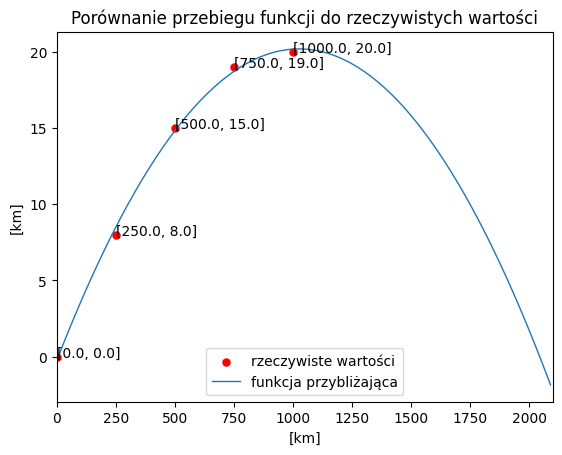

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(A[:, 1], b, linewidths=.1, c="red", label="rzeczywiste wartości")

xPlot = np.arange(0, 2100, step=10)
yPlot = x[0]*pow(xPlot, 2) + x[1]*xPlot + x[2]
ax.plot(xPlot, yPlot, linewidth=1, label="funkcja przybliżająca")

for i in range(len(b)):
    ax.text(A[i][1], b[i], s=fr"[{float(A[i][1])}, {float(b[i])}]")

ax.set(xlim=(0, 2100), xticks=np.arange(0, 2100, step=250))
plt.title("Porównanie przebiegu funkcji do rzeczywistych wartości")
plt.ylabel("[km]")
plt.xlabel("[km]")
plt.legend(loc="lower center")
plt.show()

Możemy przejść do obliczenia punktu upadku pocisku. Dla rozwiązania komputerowego wykorzystano podstawianie wartości położeni $x$ pocisku dopóki wartość $y$ nie będzie zbliżona do 0. Ponieważ znany jest jeden pierwiastek, można spróbować znaleźć drugi szukając po wartościach $x$ większych od 1000.

In [6]:
e = pow(10, -2)

for i in range(1000, 2500):
    ySolution = x[0]*i*i+x[1]*i+x[2]
    if abs(ySolution) < e:
        xSolution = i
        break

print("x = ", xSolution, "y = ", float(ySolution))
        

x =  2044 y =  0.009700571428434168


Z obliczeń wynika, że pocisk upadnie w okolicach 2044 km od punktu wystrzału.